# 1) Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
%matplotlib inline

# 2) Load dataset

In [2]:
df = pd.read_csv(r"../data/retail_sales_dataset_cleaned.csv")
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (1000, 10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Calculated
0,1,2023-11-24,CUST001,Male,34,Beauty,3.0,50.0,150.0,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2.0,500.0,1000.0,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1.0,30.0,30.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1.0,500.0,500.0,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2.0,50.0,100.0,100.0


# 3) Initial inspection: basic info and statistics

In [3]:
print("Data info:")
display(df.info())

print("\nData description (numerical and categorical):")
display(df.describe(include='all'))

print("\nMissing values per column:")
display(df.isnull().sum())

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Date              1000 non-null   object 
 2   Customer ID       1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Age               1000 non-null   int64  
 5   Product Category  1000 non-null   object 
 6   Quantity          1000 non-null   float64
 7   Price per Unit    1000 non-null   float64
 8   Total Amount      1000 non-null   float64
 9   Total_Calculated  1000 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


None


Data description (numerical and categorical):


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Calculated
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN,NaN
top,NaN,2023-05-16,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000,900.000000



Missing values per column:


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Total_Calculated    0
dtype: int64

# 4) Data cleaning & preprocessing

In [4]:
df = df.copy()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

print("Data after cleaning:")
display(df.head())

Number of duplicate rows: 0
Data after cleaning:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Calculated
0,1,2023-11-24,CUST001,Male,34,Beauty,3.0,50.0,150.0,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2.0,500.0,1000.0,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1.0,30.0,30.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1.0,500.0,500.0,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2.0,50.0,100.0,100.0


# 5) Feature engineering

In [5]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

df['Product Category'] = df['Product Category'].astype('category')
df['Gender'] = df['Gender'].astype('category')

display(df.head())

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total_Calculated,Month,DayOfWeek
0,1,2023-11-24,CUST001,Male,34,Beauty,3.0,50.0,150.0,150.0,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2.0,500.0,1000.0,1000.0,2,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1.0,30.0,30.0,30.0,1,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1.0,500.0,500.0,500.0,5,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2.0,50.0,100.0,100.0,5,5


# 6) Descriptive statistics

In [6]:
print("Total transactions:", len(df))
print("Total revenue:", df['Total Amount'].sum())
print("Revenue summary statistics:")
display(df['Total Amount'].describe())

Total transactions: 1000
Total revenue: 456000.0
Revenue summary statistics:


count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

# 7) Univariate analysis

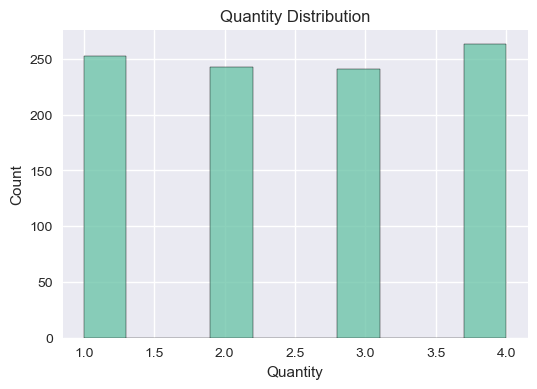

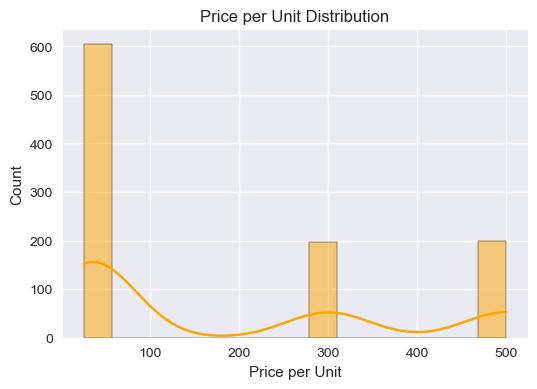

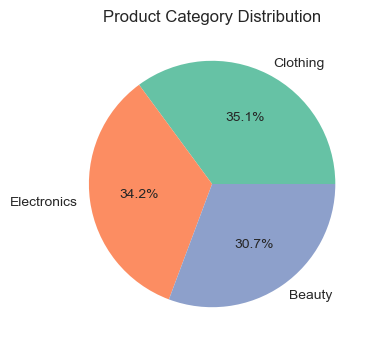

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['Quantity'], bins=10, kde=False)
plt.title('Quantity Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Price per Unit'], bins=15, kde=True, color='orange')
plt.title('Price per Unit Distribution')
plt.show()

plt.figure(figsize=(6,4))
df['Product Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Product Category Distribution')
plt.show()

# 8) Bivariate analysis

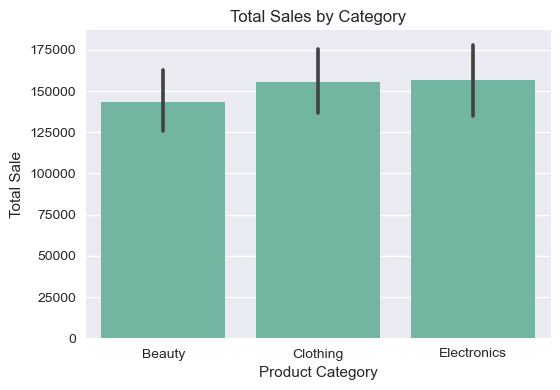

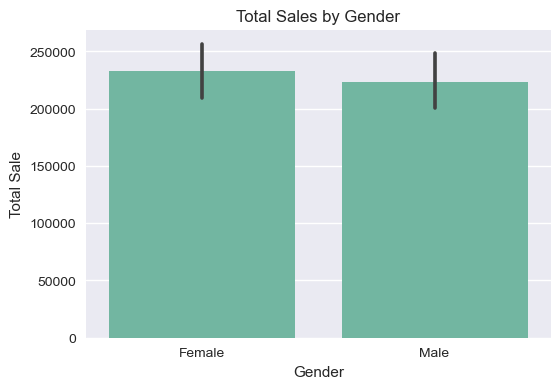

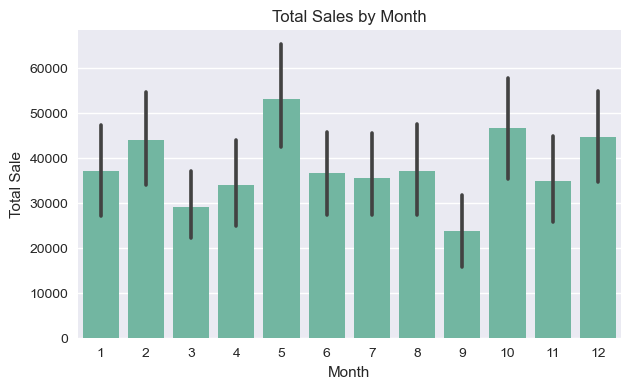

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=np.sum)
plt.title('Total Sales by Category')
plt.ylabel('Total Sale')
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=np.sum)
plt.title('Total Sales by Gender')
plt.ylabel('Total Sale')
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(x='Month', y='Total Amount', data=df, estimator=np.sum)
plt.title('Total Sales by Month')
plt.ylabel('Total Sale')
plt.show()

# 9) Correlation analysis

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


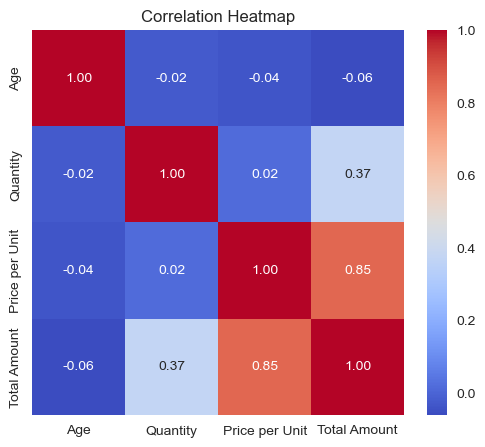

In [9]:
numeric_cols = ['Age', 'Quantity','Price per Unit','Total Amount']
corr = df[numeric_cols].corr()
display(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 10) Insights

In [10]:
print("Top categories by revenue:")
display(df.groupby('Product Category', observed=True)['Total Amount'].sum().sort_values(ascending=False))

print("\nTop months by revenue:")
display(df.groupby('Month', observed=True)['Total Amount'].sum().sort_values(ascending=False))

print("\nRevenue vs Age correlation:", df['Total Amount'].corr(df['Age']))

Top categories by revenue:


Product Category
Electronics    156905.0
Clothing       155580.0
Beauty         143515.0
Name: Total Amount, dtype: float64


Top months by revenue:


Month
5     53150.0
10    46580.0
12    44690.0
2     44060.0
1     36980.0
8     36960.0
6     36715.0
7     35465.0
11    34920.0
4     33870.0
3     28990.0
9     23620.0
Name: Total Amount, dtype: float64


Revenue vs Age correlation: -0.06056802388304569


## Recommendations & Next Steps
- Focus marketing and promotions on top-selling products and categories.
- Analyze discount strategies and their effect on revenue.
- Monitor monthly sales trends to optimize inventory.
- Extend analysis to customer segmentation if customer data available.